###Daffa Rizki Rizaly - 2301931251

# Download Image

In [12]:
# Importing required libraries
import urllib.request

# Adding information about user agent
opener=urllib.request.build_opener()
opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
urllib.request.install_opener(opener)

# setting filename and image URL
filename = 'sunshine_dog.jpg'
image_url = "https://rockandrolldaycare.com/wp-content/uploads/2021/06/image2-1.png"

# calling urlretrieve function to get resource
urllib.request.urlretrieve(image_url, filename)

('sunshine_dog.jpg', <http.client.HTTPMessage at 0x7ff66662e1d0>)

## PreProcess to Grayscale

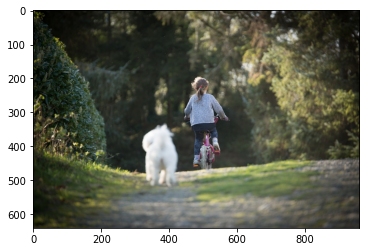

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

# Read in the image
image = mpimg.imread(filename)

plt.imshow(image)

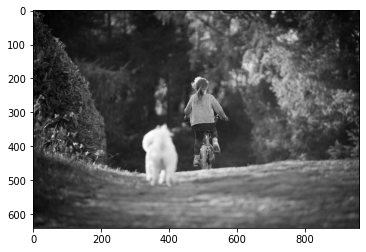

In [14]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

# Edge Detection

Please create edge detection function using these operator and please don't use any CV library. Just create simple iteration function over the image pixel value.

- Robert Operator
- Sobel Operaror
- Your own Operator

In [15]:
# initialization
row, col = gray.shape
from google.colab.patches import cv2_imshow

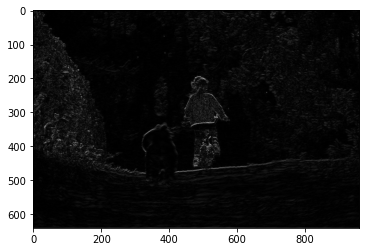

In [16]:
# TODO: Edge Detection with Robert Operator
def robert(img):
    m_robert = [[-1, -1],
                [ 1,  1]]
    for x in range(row):
        for y in range(col):
            if (y + 2 <= col) and (x + 2 <= row):
                img_1  = img[x:x+2, y:y+2]
                list_robert = m_robert*img_1 
                img[x, y] = np.abs(list_robert.sum())
    return np.uint8(img)

plt.imshow(robert(gray), cmap='gray')

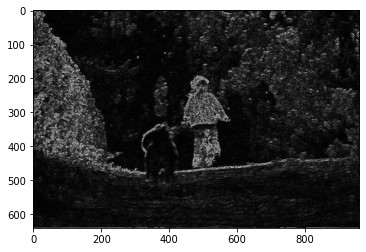

In [17]:
# TODO: Edge Detection with Sobel Operator
def sobel(img):
    Mx_sobel = np.array([[-1,  0,  1],
                        [-2,  0,  2],
                        [-1,  0,  1]])
    My_sobel = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])  
    
    new_image  = np.zeros((row, col))
    new_imageX = np.zeros(img.shape)
    new_imageY = np.zeros(img.shape)
    
    for x in range(row-2):
        for y in range(col-2):
            new_imageX[x+1, y+1] = np.abs(np.sum(img[x:x+3, y:y+3] * Mx_sobel))
            new_imageY[x+1, y+1] = np.abs(np.sum(img[x:x+3, y:y+3] * My_sobel))
            new_image[x+1, y+1] = (new_imageX[x+1, y+1] * new_imageX[x+1, y+1] + new_imageY[x+1, y+1] * new_imageY[x+1, y+1])**0.5
    return np.uint8(new_image)

plt.imshow(sobel(gray), cmap='gray')

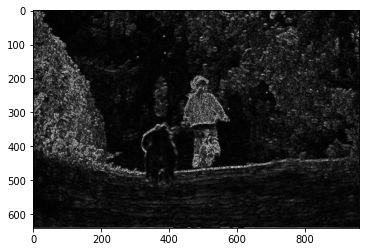

In [18]:
# TODO: Edge Detection with your own Operator
def prewitt(img):
    Mx_prewitt = np.array([[-1,  2,  1],
                          [-1,  0,  1],
                          [-1,  0,  1]])
    My_prewitt = np.array([[-1, -1, -1],
                          [ 0,  0,  0],
                          [ 1,  1,  1]]) 
    
    new_image  = np.zeros((row, col))
    new_imageX = np.zeros(img.shape)
    new_imageY = np.zeros(img.shape)
    
    for x in range(row-2):
        for y in range(col-2):
            new_imageX[x+1, y+1] = np.abs(np.sum(img[x:x+3, y:y+3] * Mx_prewitt))
            new_imageY[x+1, y+1] = np.abs(np.sum(img[x:x+3, y:y+3] * My_prewitt))
            new_image[x+1, y+1] = (new_imageX[x+1, y+1] * new_imageX[x+1, y+1] + new_imageY[x+1, y+1] * new_imageY[x+1, y+1])**0.5
    return np.uint8(new_image)
         

plt.imshow(prewitt(gray), cmap='gray')

Reference:

1.   https://www.programmerall.com/article/5215636308/
2.   https://www.geeksforgeeks.org/matlab-image-edge-detection-using-sobel-operator-from-scratch/
3. https://www.geeksforgeeks.org/matlab-image-edge-detection-using-robert-operator-from-scratch/?ref=lbp
4. https://www.geeksforgeeks.org/matlab-image-edge-detection-using-prewitt-operator-from-scratch/?ref=lbp


NameError: ignored